In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import env
from acquire import get_zillow_data
from prepare import * 

alpha = .05

import warnings
warnings.filterwarnings('ignore')

## Get Zillow data from function made on wrangle section

In [9]:
df = get_zillow_data()

Reading from csv file...


## Split the dataframe using function made in wrangle section. 

In [10]:
train, validate, test = split_zillow_data(df)

Dataframe has been split: 
Train: (29192, 6)
Validate: (12512, 6)
Test: (10426, 6)


#### Inspect Dataframe

In [11]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,county
37062,2,1.0,803.0,497472.0,1949,Los_Angeles
41022,3,2.5,1651.0,308999.0,1999,Orange
34120,3,3.0,2179.0,487016.0,1980,Orange
31939,4,2.0,1729.0,777143.0,1960,Orange
11042,3,2.0,1676.0,827428.0,1951,Los_Angeles


In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,29192.0,3.306008,0.934229,0.0,3.00,3.0,4.0,14.0
bathrooms,29192.0,2.305392,1.014234,0.0,2.00,2.0,3.0,18.0
sqft,29192.0,1924.866573,998.558409,128.0,1269.00,1663.0,2313.0,21929.0
tax_value,29192.0,530610.576082,764342.038584,9242.0,194715.25,375000.0,622476.0,49061236.0
year_built,29192.0,1963.503631,23.064984,1880.0,1950.00,1961.0,1979.0,2016.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29192 entries, 37062 to 25645
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    29192 non-null  int64  
 1   bathrooms   29192 non-null  float64
 2   sqft        29192 non-null  float64
 3   tax_value   29192 non-null  float64
 4   year_built  29192 non-null  int64  
 5   county      29192 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.6+ MB


#### Splitted Dataframe Heatmap

<AxesSubplot:>

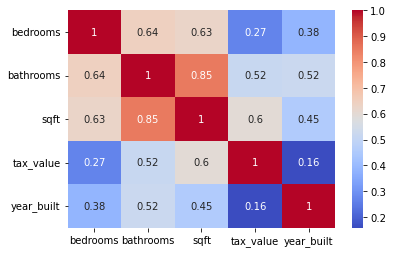

In [14]:
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)

#### Splitted Dataframe Pairplot

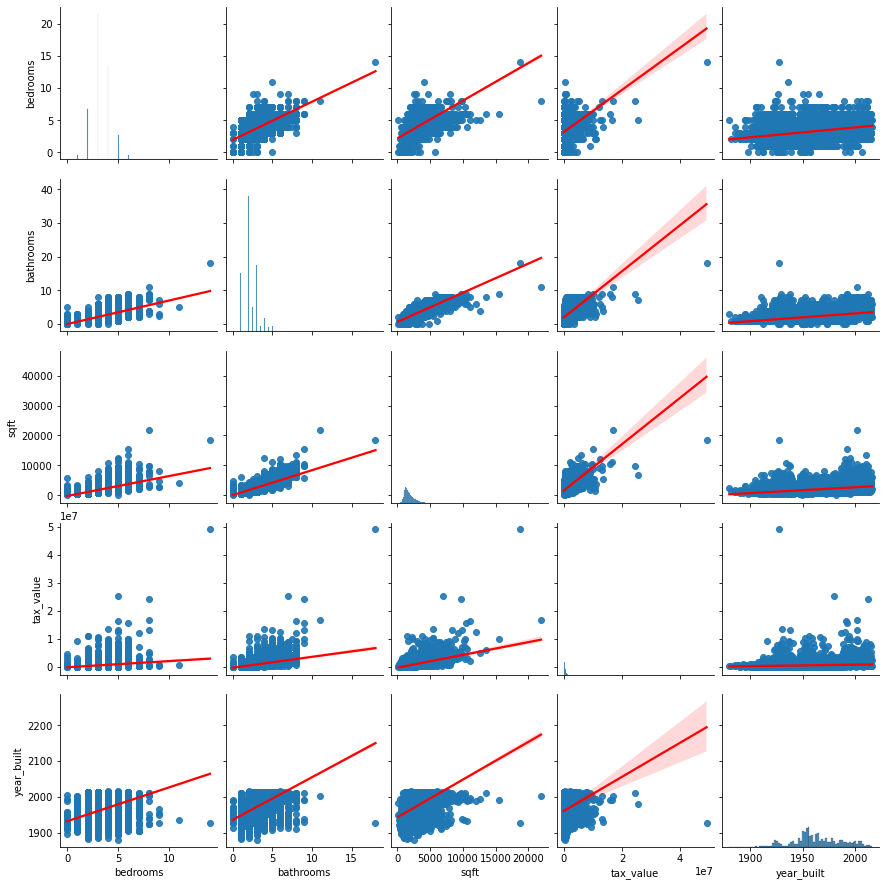

In [15]:
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha':0.9}})

#### Tax Value vs Square footage

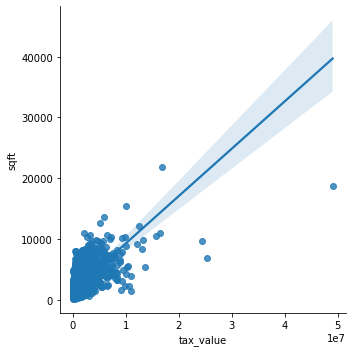

In [16]:
sns.lmplot(x='tax_value', y= 'sqft', data=train)

#### Tax Value vs Year Built

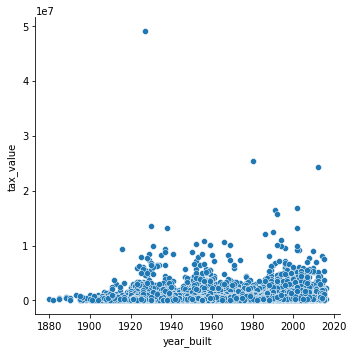

In [17]:
sns.relplot(y='tax_value', x= 'year_built', data=train)

#### Tax Value vs Bathrooms

<AxesSubplot:xlabel='bathrooms', ylabel='tax_value'>

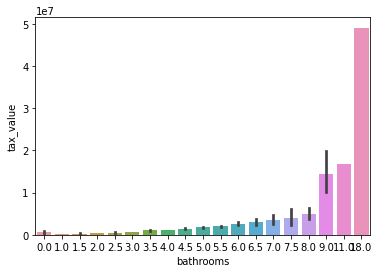

In [18]:
sns.barplot(x='bathrooms', y='tax_value', data=train)

#### Tax Value vs Bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

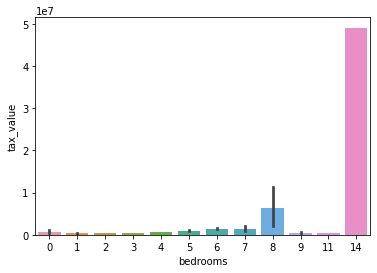

In [19]:
sns.barplot(x='bedrooms', y='tax_value', data=train)

#### Tax Value vs Bathrooms with Bedrooms as hue

<AxesSubplot:xlabel='bathrooms', ylabel='tax_value'>

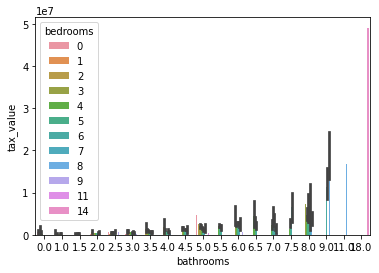

In [20]:
sns.barplot(x='bathrooms', hue= 'bedrooms', y='tax_value', data=train)

## Let's remove outliers and see the difference

In [21]:
df_no_outliers = get_zillow_data()
df_no_outliers.head()

Reading from csv file...


,bedrooms,bathrooms,sqft,tax_value,year_built,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0


In [22]:
df_no_outliers = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'sqft', 'tax_value'])
df_no_outliers.head()

Number of observations removed: 5670


,bedrooms,bathrooms,sqft,tax_value,year_built,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0


In [23]:
train_no, validate_no, test_no = split_zillow_data(df_no_outliers)

Dataframe has been split: 
Train: (26076, 6)
Validate: (11176, 6)
Test: (9313, 6)


In [24]:
train_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26076 entries, 49486 to 51178
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    26076 non-null  int64  
 1   bathrooms   26076 non-null  float64
 2   sqft        26076 non-null  float64
 3   tax_value   26076 non-null  float64
 4   year_built  26076 non-null  int64  
 5   county      26076 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.4+ MB


In [25]:
train_no.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,26076.0,3.228294,0.793888,2.0,3.00,3.0,4.0,5.0
bathrooms,26076.0,2.134607,0.753516,1.0,2.00,2.0,3.0,4.5
sqft,26076.0,1731.433425,646.035460,326.0,1245.00,1588.0,2100.0,3863.0
tax_value,26076.0,387251.948190,262440.201732,13352.0,179388.75,342955.0,538000.0,1256879.0
year_built,26076.0,1962.403896,22.010940,1878.0,1950.00,1960.0,1977.0,2016.0


### Splitted Dataframe Heatmap 

In [110]:
def exploration_proc(df):

    '''This function will give the explotation charts used'''
    
    plt.title('Splitted Dataframe Heatmap')
    sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
    
    sns.pairplot(df, kind= 'hist')


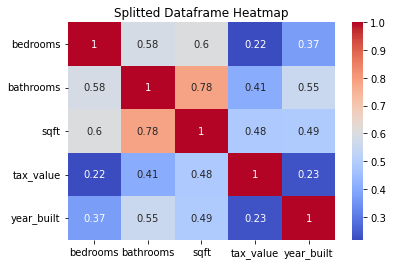

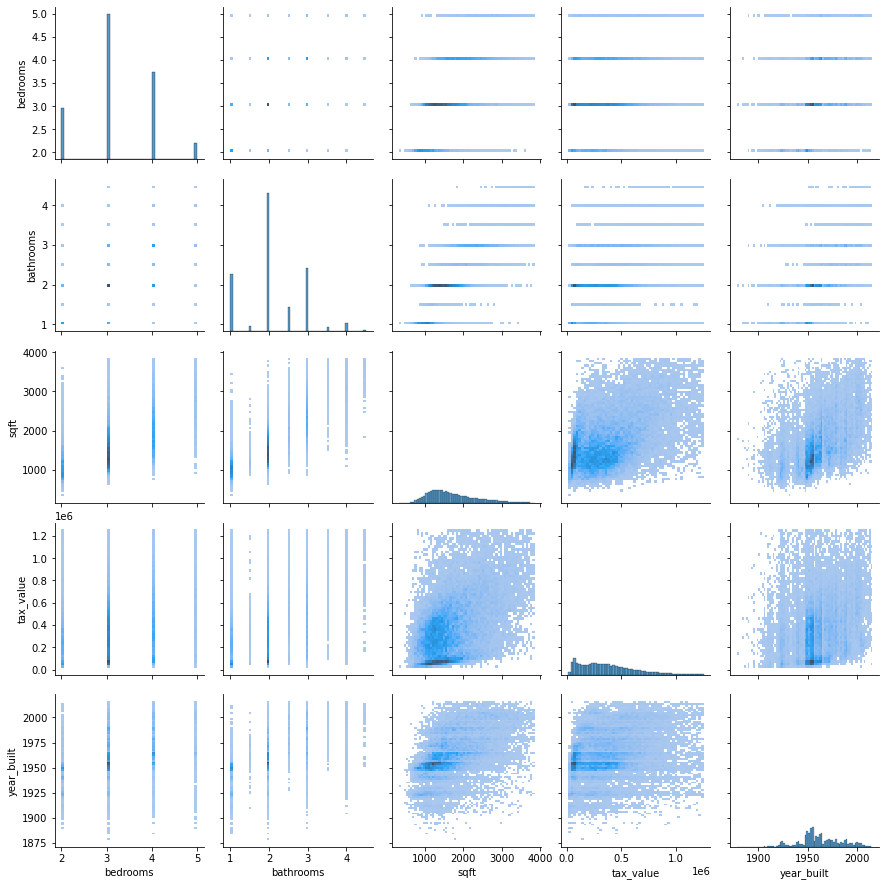

In [111]:
exploration_proc(train_no)

<AxesSubplot:>

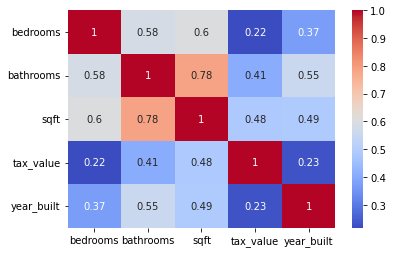

In [26]:
sns.heatmap(train_no.corr(), cmap='coolwarm', annot=True)

#### Splitted Dataframe Pairplot

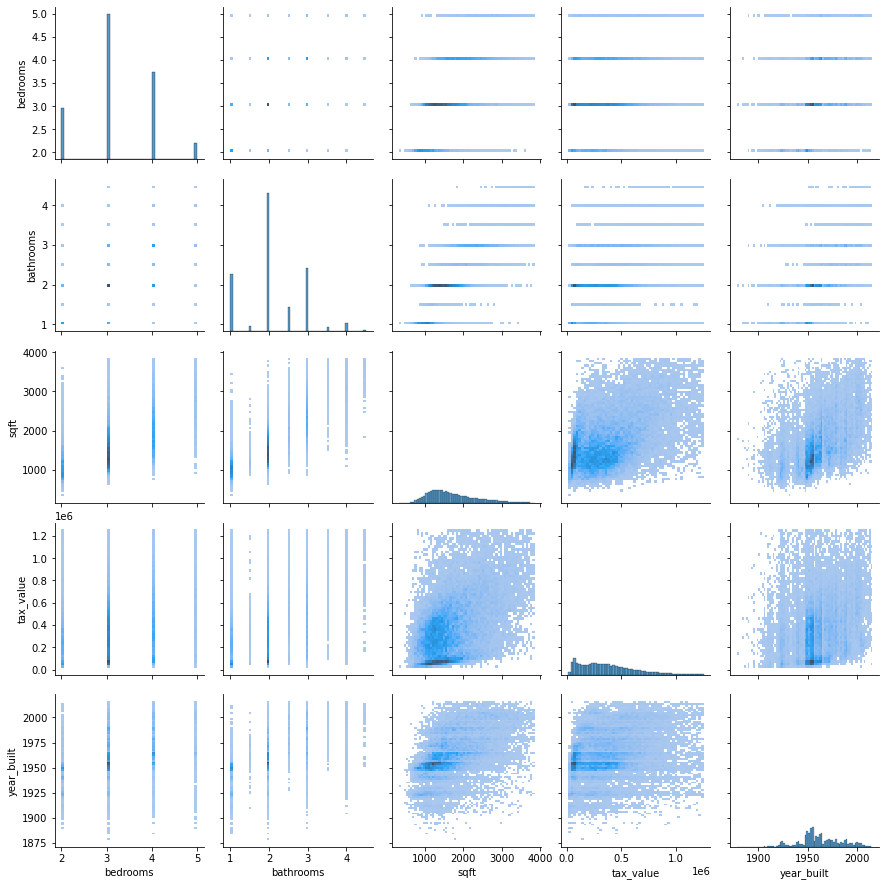

In [27]:
sns.pairplot(train_no, kind= 'hist')

#### Tax Value vs Square Footage

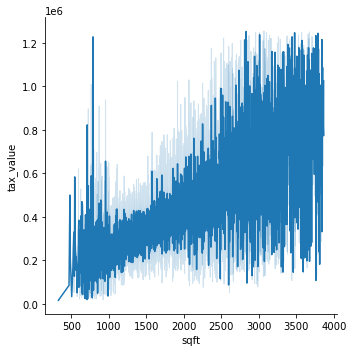

In [28]:
sns.relplot(y='tax_value', x= 'sqft', data=train_no, kind='line')

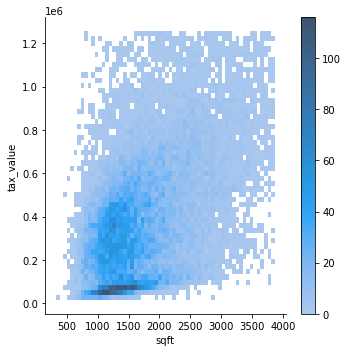

In [55]:
sns.displot(data= train_no, x='sqft', y='tax_value', cbar=True)

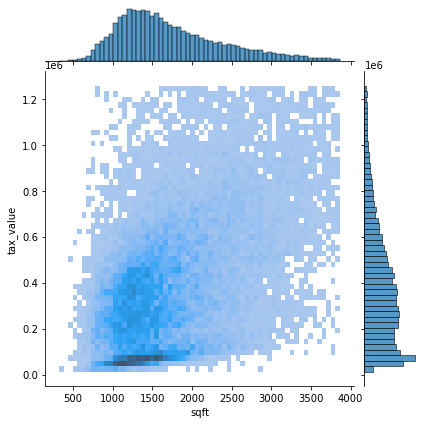

In [54]:
sns.jointplot(data= train_no, x='sqft', y='tax_value', kind ='hist')

#### Tax Value vs Year Built

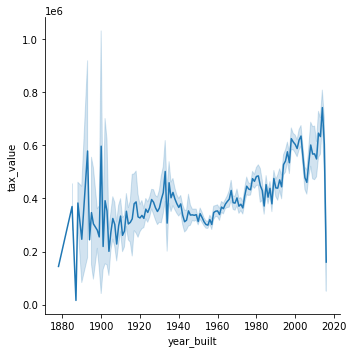

In [30]:
sns.relplot(y='tax_value', x= 'year_built', data=train_no, kind='line')

#### Tax value vs Bathrooms 

<AxesSubplot:xlabel='bathrooms', ylabel='tax_value'>

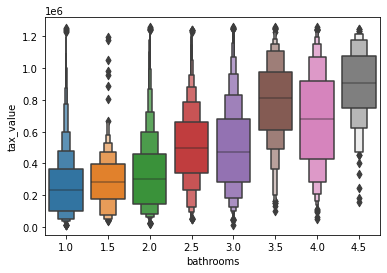

In [31]:
sns.boxenplot(y='tax_value', x= 'bathrooms', data=train_no)

#### Tax value vs Bedrooms 

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

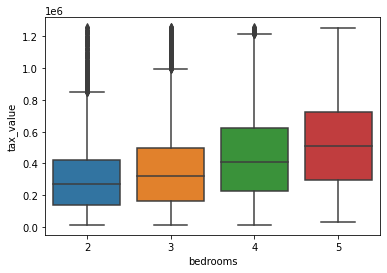

In [32]:
sns.boxplot(y='tax_value', x= 'bedrooms', data=train_no)

#### Tax value vs Bathrooms, bedrooms as hue 

<AxesSubplot:xlabel='bathrooms', ylabel='tax_value'>

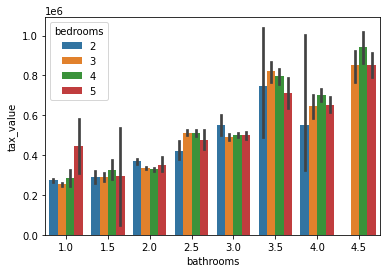

In [33]:
sns.barplot(x='bathrooms', hue= 'bedrooms', y='tax_value', data=train_no)

#### Tax value vs County

<AxesSubplot:xlabel='county', ylabel='tax_value'>

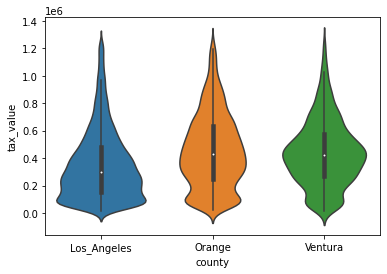

In [34]:
sns.violinplot(y='tax_value', x= 'county', data=train_no)

## Takeaways:
- More bathrooms more value
- More bedrooms more value
- There seem to be a tax value difference between counties
- More square footage more value

In [35]:
def get_q1(df):

    '''This function is going to cover the charts for question 1'''

    # bathroom vs tax value
    plt.title('Tax Value vs Bathroom')
    sns.boxenplot(y= 'tax_value', x= 'bathrooms', data = df)
    plt.show()

    # bedroom vs tax value
    plt.title('Tax Value vs Bedroom')
    sns.boxplot(y= 'tax_value', x= 'bedrooms', data = df)
    plt.show()
    
    # tax value vs bathroom and bedrooms
    plt.title('Tax Value vs Bathroom with Bedrooms as hue')
    sns.barplot(x= 'bathrooms', hue= 'bedrooms', y='tax_value', data = df)
    plt.show()

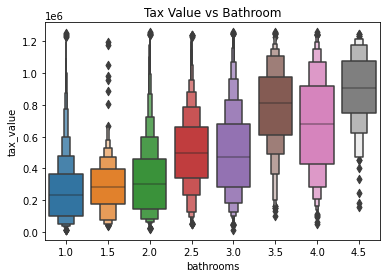

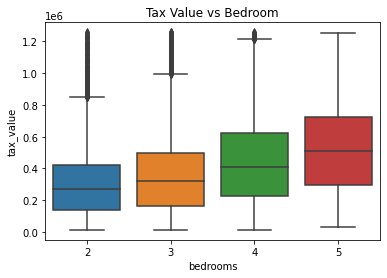

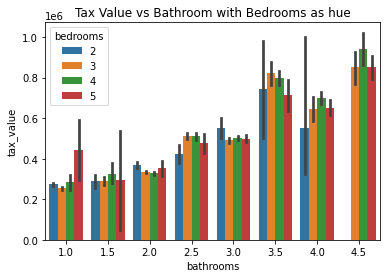

In [36]:
get_q1(train_no)

In [37]:
def get_q2(df):
    
    '''This function is going to cover the charts for question 2'''

    # Tax Value vs Age
    sns.relplot(y='tax_value', x= 'year_built', data=df, kind='line').set(title='Tax Value vs Year Built')
    plt.show()



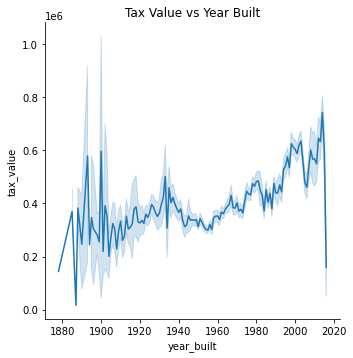

In [38]:
get_q2(train_no)

In [39]:
observed = pd.crosstab(train_no.tax_value, train_no.year_built)
observed

year_built,1878,1885,1887,1888,1890,1893,1894,1895,1896,1898,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
tax_value,,,,,,,,,,,,,,,,,,,,,
13352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14231.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14284.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15433.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15870.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254219.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1255422.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255855.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed
:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------
Expected: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------

chi2 = 2651342.16
p value: 0.0187
degrees of freedom: 2646553
We reject the null hypothesis


In [41]:
def q2_stat_test():
    # setting up the alpha
    alpha = .05
    
    # state the hypothesis
    print('HO: There is no relation between Tax Rate and Year Built')
    print('H⍺: There is a relation between Tax Rate and Year Built')
    print('')
    
    # statistical test  
    observed = pd.crosstab(train_no.tax_value, train_no.year_built)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print('Observed\n:')
    print(observed.values)
    print('------------------------\nExpected: \n')
    print(expected.astype(int))
    print('------------------------\n')
    print(f'chi2 = {chi2:.2f}')
    print(f'p value: {p:.4f}')
    print(f'degrees of freedom: {degf}')
    if (p < alpha):
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

In [42]:
q2_stat_test()

HO: There is no relation between Tax Rate and Year Built
H⍺: There is a relation between Tax Rate and Year Built

Observed
:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------
Expected: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------

chi2 = 2651342.16
p value: 0.0187
degrees of freedom: 2646553
We reject the null hypothesis


In [79]:
def get_q3(df):
    
    '''This function is going to cover the charts for question 3'''

    # Tax Value vs sqft
    sns.displot(data= df, x='sqft', y='tax_value',cbar=True).set(title='Tax Value vs Square Footage')
    plt.show()
    sns.jointplot(data= df, x='sqft', y='tax_value', kind ='hist')
    plt.show()

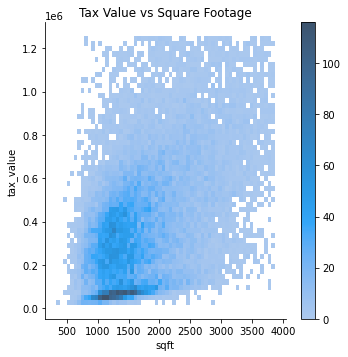

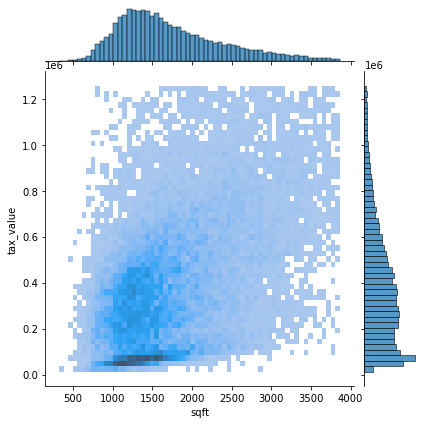

In [80]:
get_q3(train_no)

In [94]:
def get_q4(df):
    
    '''This function is going to cover the charts for question 4'''

    # Tax Value vs sqft
    plt.title('Tax Value vs County')
    sns.violinplot(y='tax_value', x= 'county', data=df)
    sns.catplot(y='tax_value', x= 'county', data=df)



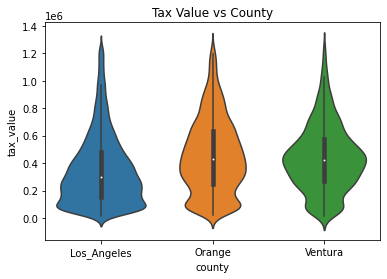

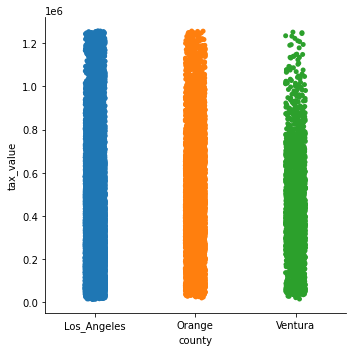

In [95]:
get_q4(train_no)

In [83]:
observed = pd.crosstab(train_no.tax_value, train_no.county)
observed

county,Los_Angeles,Orange,Ventura
tax_value,,,
13352.0,1,0,0
14231.0,1,0,0
14284.0,1,0,0
15433.0,0,0,1
15870.0,1,0,0
...,...,...,...
1254219.0,0,1,0
1255422.0,0,1,0
1255855.0,0,1,0


In [96]:
def q4_stat_test(df):
    # setting up the alpha
    alpha = .05
    
    # state the hypothesis
    print('HO: There is no relation between Tax Value and County')
    print('H⍺: There is a relation between Tax Value and County')
    print('')
    
    # statistical test  
    observed = pd.crosstab(df.tax_value, df.county)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print('Observed\n:')
    print(observed.values)
    print('------------------------\nExpected: \n')
    print(expected.astype(int))
    print('------------------------\n')
    print(f'chi2 = {chi2:.2f}')
    print(f'p value: {p:.4f}')
    print(f'degrees of freedom: {degf}')
    if (p < alpha):
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

In [97]:
q4_stat_test(train_no)

HO: There is no relation between Tax Value and County
H⍺: There is a relation between Tax Value and County

Observed
:
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [1 0 0]
 [1 0 0]]
------------------------
Expected: 

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
------------------------

chi2 = 45104.30
p value: 0.0000
degrees of freedom: 41678
We reject the null hypothesis
